This notebook opens the MUSE files and locates the SNe within them, plotting them in a folder.
This notebook also writes the MUSE galaxies and their filenames in ../Data/MUSEdata.csv

The MUSE files have this address: /data/fourier/sun.1608/PHANGS/MUSE/DR2.2/MUSEDAP/copt/



In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import sys, os
# !{sys.executable} -m pip install aplpy
import numpy as np
import aplpy
from astropy.table import Table

In [2]:
# Organize MUSE galaxies and their information in MUSE table

fileNames = ["IC5332-0.87asec_MAPS.fits", "NGC2835-1.15asec_MAPS.fits", "NGC0628-0.92asec_MAPS.fits", 
             "NGC3351-1.05asec_MAPS.fits", "NGC1087-0.92asec_MAPS.fits", "NGC3627-1.05asec_MAPS.fits", 
             "NGC1300-0.89asec_MAPS.fits", "NGC4254-0.89asec_MAPS.fits", "NGC1365-1.15asec_MAPS.fits", 
             "NGC4303-0.78asec_MAPS.fits", "NGC1385-0.77asec_MAPS.fits", "NGC4321-1.16asec_MAPS.fits", 
             "NGC1433-0.91asec_MAPS.fits", "NGC4535-0.56asec_MAPS.fits", "NGC1512-1.25asec_MAPS.fits", 
             "NGC5068-1.04asec_MAPS.fits", "NGC1566-0.80asec_MAPS.fits", "NGC7496-0.89asec_MAPS.fits",
             "NGC1672-0.96asec_MAPS.fits"]

for i in range(len(fileNames)):
    ending = fileNames[i]
    fileNames[i] = "/data/fourier/sun.1608/PHANGS/MUSE/DR2.1/MUSEDAP/copt/" + ending

galaxies = ["IC5332", "NGC2835", "NGC0628", "NGC3351", "NGC1087", "NGC3627", "NGC1300", "NGC4254", "NGC1365",
            "NGC4303", "NGC1385", "NGC4321", "NGC1433", "NGC4535", "NGC1512", "NGC5068", "NGC1566", "NGC7496",
            "NGC1672"]

resolutions = [0.87, 1.15, 0.92, 1.05, 0.92, 1.05, 0.89, 0.89, 1.15, 0.78, 0.77, 1.16, 0.91, 0.56, 1.25, 1.04,
              0.80, 0.89, 0.96]

MUSEtable = Table({"Galaxy": galaxies, 
                   "MUSEResolution": resolutions, 
                   "MUSEmap": fileNames})

MUSEtable.sort("Galaxy")
MUSEtable.write('../Data/0.MUSEdata.csv', overwrite=True)  

#MUSEtable


In [3]:
# for i in range(len(MUSEtable)):
#     fileName = MUSEtable["MUSEmap"][i]
#     hdulist = fits.open(fileName)
#     hdr  = hdulist["HA6562_FLUX"].header
#     data = hdulist["HA6562_FLUX"].data
#     logData = np.log10(data)
#     plt.imshow(logData)
#     fig.show_colorscale(cmap = 'magma')
#     fig.set_title(MUSEtable["Galaxy"][i])
#     figName = "../Figures/MUSEImages/" + MUSEtable["Galaxy"][i] + ".png"
#     fig.savefig(figName, dpi=300)
#     plt.show()
#     plt.close()

<ipython-input-4-a74300597a08>:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  current_cmap.set_bad("black")
<ipython-input-4-a74300597a08>:24: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)


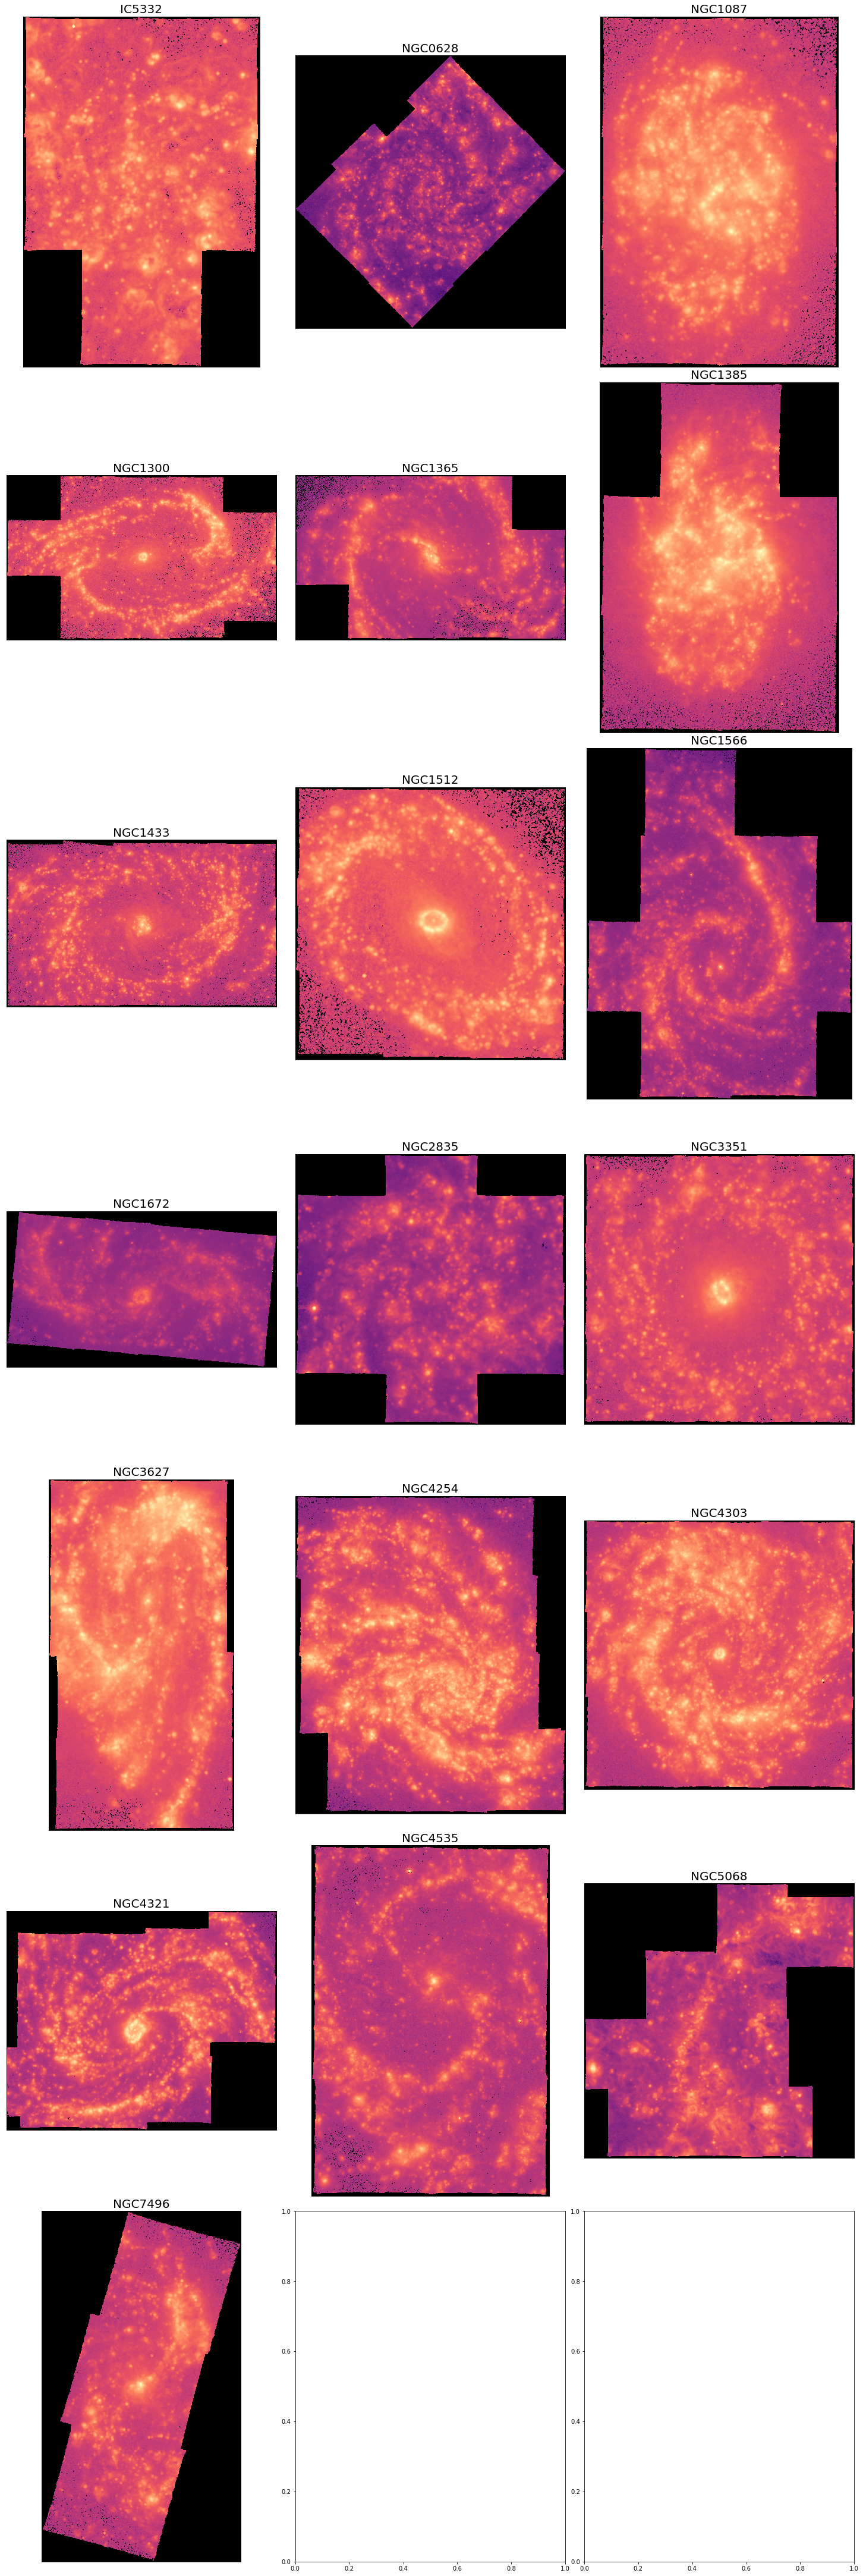

In [4]:
# set up plots & wcs information.
import matplotlib.pyplot as plt
from astropy.wcs import WCS
plots, wcss, hdus = [],[],[]

for i in range(len(MUSEtable)):
    fileName = MUSEtable["MUSEmap"][i]
    if os.path.isfile(fileName):
        MUSE_hdu = fits.open(fileName)
        hdus.append(MUSE_hdu)
        MUSE_map = MUSE_hdu["HA6562_FLUX"].data
        plots.append(MUSE_map)
        wcss.append(WCS(MUSE_hdu["HA6562_FLUX"].header, naxis=2))

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

# make multipanel plot of MUSE galaxies 
import math
i,j,m=0,0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(plots)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))
for plot in plots:
    logplot = np.log10(plot)
    axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest")
    axs[i][j].set_title(MUSEtable["Galaxy"][m].upper(), fontsize=20)
    axs[i][j].set_xticks([])
    axs[i][j].set_yticks([])
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m+=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/AllMUSEGalaxies.png", dpi=300)
plt.close()

